Dataset loaded successfully.
Rationale for choosing the Hugging Face model:
 
We chose the Hugging Face pre-trained sentiment-analysis model due to its:
1. High accuracy on diverse text datasets.
2. Accessibility and ease of integration.
3. Ability to generalize across multiple domains, making it ideal for commentary excerpts analysis.



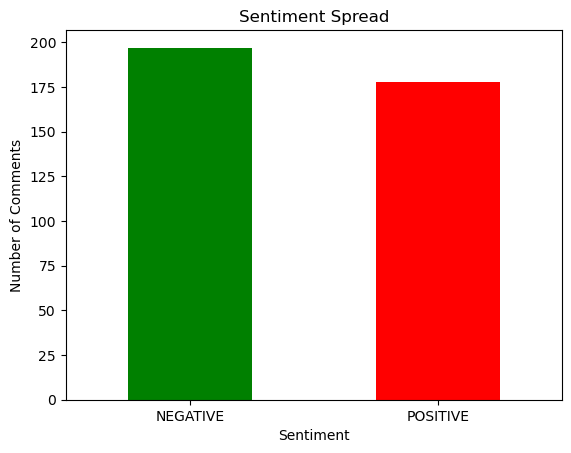

Updated dataset saved successfully to commentary_2023_updated.csv.


In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"E:/CASE2/CASE2/commentary/commentary_2023.csv"

try:
    commentary_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")

# Fit a Hugging Face model
# Load a pre-trained sentiment analysis model from Hugging Face
sentiment_analyzer = pipeline(
    "sentiment-analysis", 
    model="distilbert-base-uncased-finetuned-sst-2-english", 
    revision="714eb0f"
)

# Apply the model to detect sentiment for each excerpt
def detect_sentiment(text):
    try:
        # Process text within the token limit of the model
        result = sentiment_analyzer(text[:512])[0]
        return result['label']
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return "Error"

# Add the sentiment to the dataset as a new column
commentary_data['sentiment'] = commentary_data['commentary'].apply(detect_sentiment)

# Provide the rationale
rationale = """
We chose the Hugging Face pre-trained sentiment-analysis model due to its:
1. High accuracy on diverse text datasets.
2. Accessibility and ease of integration.
3. Ability to generalize across multiple domains, making it ideal for commentary excerpts analysis.
"""
print("Rationale for choosing the Hugging Face model:\n", rationale)

# Visualize the sentiment spread
try:
    sentiment_counts = commentary_data['sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title('Sentiment Spread')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=0)
    plt.show()
except Exception as e:
    print(f"Error generating plot: {e}")

# Save the updated dataset
updated_file_path = 'commentary_2023_updated.csv'

try:
    commentary_data.to_csv(updated_file_path, index=False)
    print(f"Updated dataset saved successfully to {updated_file_path}.")
except Exception as e:
    print(f"Error saving file: {e}")   